In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [14]:
# load the data
df = pd.read_csv("../Data/house-prices-advanced-regression-techniques/train.csv")

In [15]:
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [18]:
df.shape

(1460, 81)

In [19]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [20]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
numeric_df.shape

(1460, 38)

In [21]:
numeric_df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# Skew check
# Interpretation:

# Skew ≈ 0 → symmetric

# Skew > 1 → highly right-skewed

# Skew < -1 → highly left-skewed

numeric_df.skew().sort_values(ascending=False)

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
MoSold            0.212053
BedroomAbvGr      0.211790
GarageArea        0.179981
YrSold            0.096269
FullBath          0.036562
Id                0.000000
GarageCars       -0.342549
YearRemodAdd     -0.503562
YearBuilt        -0.613461
G

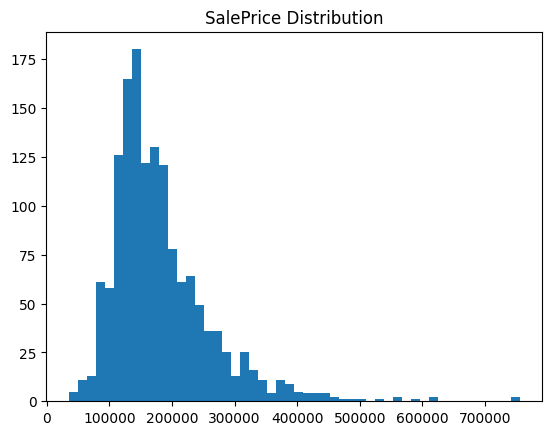

In [31]:
import matplotlib.pyplot as plt

plt.hist(df["SalePrice"], bins=50)
plt.title("SalePrice Distribution")
plt.show()

In [27]:
corr = numeric_df.corr()["SalePrice"].sort_values(ascending=False)
corr.head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [32]:
# Now use standard linear regression model to predict house prices without any regularization
# Separate target and features
y = np.log1p(df["SalePrice"])   # log target (important)
X = df.drop(columns=["SalePrice"])

# Use numeric features only
X = X.select_dtypes(include=["int64", "float64"])
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
scaler.mean_

array([7.30904966e+02, 5.68493151e+01, 7.00941781e+01, 1.06896421e+04,
       6.12157534e+00, 5.58476027e+00, 1.97096575e+03, 1.98489726e+03,
       1.03238870e+02, 4.46023973e+02, 4.51523973e+01, 5.70595034e+02,
       1.06177140e+03, 1.16935445e+03, 3.52351027e+02, 5.69606164e+00,
       1.52740154e+03, 4.25513699e-01, 5.73630137e-02, 1.57705479e+00,
       3.81849315e-01, 2.89041096e+00, 1.04794521e+00, 6.56164384e+00,
       6.18150685e-01, 1.97873545e+03, 1.78167808e+00, 4.76273973e+02,
       9.59469178e+01, 4.95787671e+01, 2.18390411e+01, 3.81250000e+00,
       1.54075342e+01, 2.95547945e+00, 5.12671233e+01, 6.35616438e+00,
       2.00781849e+03])

In [35]:
scaler.scale_

array([4.25186956e+02, 4.25136509e+01, 2.24597746e+01, 1.07547593e+04,
       1.36703368e+00, 1.11558416e+00, 3.06623602e+01, 2.07250773e+01,
       1.72672388e+02, 4.58874415e+02, 1.58149755e+02, 4.46173429e+02,
       4.40487644e+02, 3.86509704e+02, 4.39382660e+02, 4.78666017e+01,
       5.24208138e+02, 5.19746787e-01, 2.36188118e-01, 5.46678223e-01,
       4.99738978e-01, 8.04510297e-01, 2.25351834e-01, 1.61901206e+00,
       6.44852647e-01, 2.40329264e+01, 7.39844434e-01, 2.11004987e+02,
       1.29630411e+02, 6.94038506e+01, 6.20566449e+01, 3.15061684e+01,
       5.58572209e+01, 4.16306707e+01, 5.52802887e+02, 2.66956393e+00,
       1.32207306e+00])

In [37]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [39]:
# scaler.fit() → learns mean & std

# lin_reg.fit() → learns coefficients & intercept

# PCA.fit() → learns principal directions

# KMeans.fit() → learns cluster centers
lin_reg.coef_



array([-0.00239703, -0.03160949, -0.01176246,  0.02000701,  0.11695434,
        0.0494388 ,  0.09070044,  0.02747309, -0.00345183,  0.01026295,
        0.00100776,  0.00258627,  0.01367281,  0.03652721,  0.03011725,
        0.0062094 ,  0.05274306,  0.03769174,  0.00378705,  0.01810992,
        0.01092361,  0.001608  , -0.01029933,  0.02343744,  0.03159176,
       -0.00943264,  0.05464137,  0.0084903 ,  0.01596971, -0.00234705,
        0.00963875,  0.00922006,  0.01830922, -0.01661118, -0.00123496,
        0.00096511, -0.00726324])

In [40]:
lin_reg.intercept_

np.float64(12.030658310971573)

In [41]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y, test_size=0.2, random_state=7
)

scaler2 = StandardScaler()
X_train2_scaled = scaler2.fit_transform(X_train2)

lin_reg2 = LinearRegression()
lin_reg2.fit(X_train2_scaled, y_train2)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [42]:
pd.DataFrame({
    "feature": X.columns,
    "coef_run1": lin_reg.coef_,
    "coef_run2": lin_reg2.coef_
}).head(10)

,feature,coef_run1,coef_run2
0,Id,-0.002397,-0.000428
1,MSSubClass,-0.031609,-0.032104
2,LotFrontage,-0.011762,-0.004590
3,LotArea,0.020007,0.015323
4,OverallQual,0.116954,0.114506
5,OverallCond,0.049439,0.052703
6,YearBuilt,0.090700,0.087997
7,YearRemodAdd,0.027473,0.027607
8,MasVnrArea,-0.003452,-0.000880
9,BsmtFinSF1,0.010263,0.012135


In [43]:
y_train_pred = lin_reg.predict(X_train_scaled)

In [44]:
y_test_pred = lin_reg.predict(X_test_scaled)

In [45]:
from sklearn.metrics import mean_squared_error
import numpy as np

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_rmse, test_rmse


(np.float64(0.1440137158382102), np.float64(0.15186257287994892))

In [47]:
log_pred = y_test_pred[0]
log_true = y_test.iloc[0]

In [48]:
predicted_price = np.expm1(log_pred)
actual_price = np.expm1(log_true)

predicted_price, actual_price

(np.float64(154695.34588865438), np.float64(154500.00000000012))